In [1]:
from nlp_functions import *
sess = tf.Session()

Using TensorFlow backend.


In [2]:
plt.style.use('seaborn')

In [3]:
# Importing our data
sentiment140 = read_sentiment_file(DATA_DIRECTORY, 'sentiment140_train.csv')

In [4]:
# Sampling 50% the data
sentiment140 = sentiment140.sample(frac=0.5, random_state=7)

In [5]:
# Separating into characteristics and labels
X = sentiment140['text']
y = sentiment140['polarity']

In [6]:
# Cleaning the texts
X = clean_data(X)

In [7]:
# Mapping for easier classificacion
y = y.map({0: int(0), 4: int(1)})

In [8]:
# Split the data to train and test, then train and val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

In [9]:
# Tokenizing the data
tk, word_index, vocab_size = tokenize(X_train, X_val, X_test)

In [10]:
# Each sentence is converted into an array of integers
X_train = tk.texts_to_sequences(X_train)
X_val = tk.texts_to_sequences(X_val)
X_test = tk.texts_to_sequences(X_test)

In [11]:
# Calculation of maximum length to adjust the padding
maxlen = longest_sentence(X_train, X_val, X_test)

In [12]:
# Padding is applied to get the same dimension
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [13]:
# Creating the embedding matrix based on dimension and vocabulary of our texts
EMBEDDING_DIM = 50
embedding_matrix = create_embedding_matrix(vocab_size, EMBEDDING_DIM, word_index)

In [14]:
# Check the ratio of words in our texts are included in the embedding_matrix
print('Using GloVe (Wiki database)')
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

Using GloVe (Wiki database)


0.47543481020693157

In [15]:
# Architecture for CNN + GloVe model
model = Sequential()
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False))
model.add(Conv1D(
    filters=250,
    kernel_size=3,
    activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            6695450   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 250)           37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (De

In [16]:
# Training and validation for CNN + GloVe model
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping])


Train on 512000 samples, validate on 128000 samples
Epoch 1/100
512000/512000 [==============================] - 26s 51us/step - loss: 0.5875 - accuracy: 0.6847 - precision: 0.6860 - recall: 0.6808 - val_loss: 0.5347 - val_accuracy: 0.7299 - val_precision: 0.7570 - val_recall: 0.6773
Epoch 2/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.5337 - accuracy: 0.7321 - precision: 0.7381 - recall: 0.7193 - val_loss: 0.5160 - val_accuracy: 0.7413 - val_precision: 0.7862 - val_recall: 0.6632
Epoch 3/100
512000/512000 [==============================] - 25s 49us/step - loss: 0.5154 - accuracy: 0.7455 - precision: 0.7527 - recall: 0.7308 - val_loss: 0.5033 - val_accuracy: 0.7503 - val_precision: 0.7918 - val_recall: 0.6793
Epoch 4/100
512000/512000 [==============================] - 25s 49us/step - loss: 0.5038 - accuracy: 0.7531 - precision: 0.7604 - recall: 0.7388 - val_loss: 0.4906 - val_accuracy: 0.7601 - val_precision: 0.7589 - val_recall: 0.7625
Epoch 5/100
512

Epoch 35/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.4201 - accuracy: 0.8045 - precision: 0.8119 - recall: 0.7924 - val_loss: 0.4675 - val_accuracy: 0.7801 - val_precision: 0.7558 - val_recall: 0.8279
Epoch 36/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.4192 - accuracy: 0.8050 - precision: 0.8126 - recall: 0.7927 - val_loss: 0.4602 - val_accuracy: 0.7849 - val_precision: 0.7937 - val_recall: 0.7699
Epoch 37/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.4184 - accuracy: 0.8052 - precision: 0.8126 - recall: 0.7932 - val_loss: 0.4593 - val_accuracy: 0.7850 - val_precision: 0.7877 - val_recall: 0.7806
Epoch 38/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.4171 - accuracy: 0.8057 - precision: 0.8132 - recall: 0.7934 - val_loss: 0.4585 - val_accuracy: 0.7834 - val_precision: 0.7947 - val_recall: 0.7645
Epoch 39/100
512000/512000 [==============================] - 25

In [17]:
metrics = pd.DataFrame(history.history)
metrics

,val_loss,val_accuracy,val_precision,val_recall,loss,accuracy,precision,recall
0,0.534667,0.729859,0.757045,0.677252,0.587527,0.684686,0.685965,0.680805
1,0.515959,0.741328,0.786201,0.663178,0.533684,0.732137,0.738077,0.719347
2,0.503314,0.750297,0.791847,0.679345,0.515367,0.745459,0.752719,0.730808
3,0.490644,0.760070,0.758943,0.762488,0.503822,0.753098,0.760398,0.738807
4,0.493657,0.756648,0.809067,0.672066,0.494813,0.759469,0.767235,0.744677
5,0.488628,0.759578,0.812364,0.675299,0.487864,0.763609,0.771040,0.749647
6,0.479692,0.767570,0.755034,0.792384,0.481959,0.768129,0.775400,0.754680
7,0.477785,0.767773,0.801714,0.711740,0.476333,0.771162,0.777825,0.758928
8,0.476703,0.769203,0.808861,0.705211,0.472035,0.774986,0.781796,0.762668
9,0.469611,0.773742,0.791132,0.744088,0.468152,0.776535,0.783079,0.764743


In [18]:
print(f'Best training loss: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,4]}')
print(f'Best training accuracy: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,5]}')
print(f'Best training precision: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,6]}')
print(f'Best training recall: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,7]}')
print('---------------------------------------------')
print(f'Best validation loss: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,0]}')
print(f'Best validation accuracy: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,1]}')
print(f'Best validation precision: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,2]}')
print(f'Best validation recall: {metrics.sort_values(by="val_loss", ascending=True).iloc[0,3]}')

Best training loss: 0.42482899607345465
Best training accuracy: 0.8018437623977661
Best training precision: 0.8086927533149719
Best training recall: 0.7905534505844116
---------------------------------------------
Best validation loss: 0.4564046332389116
Best validation accuracy: 0.784781277179718
Best validation precision: 0.7936998605728149
Best validation recall: 0.7697978615760803


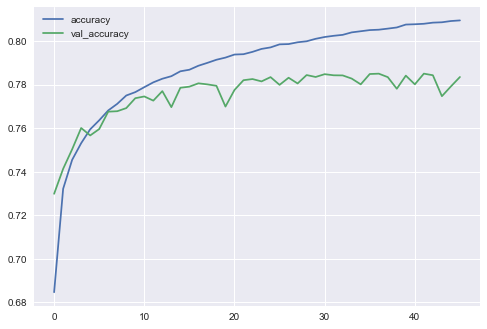

In [19]:
metrics[['accuracy','val_accuracy']].plot()
plt.savefig('../figures/cnn_glove50_50_acc.jpg', dpi=300)

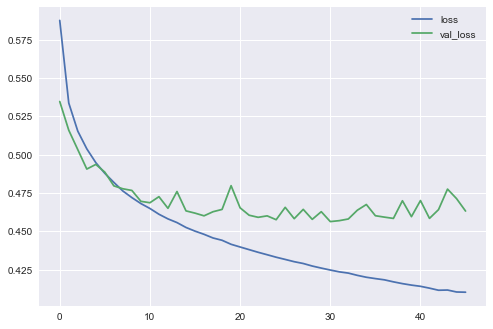

In [20]:
metrics[['loss','val_loss']].plot()
plt.savefig('../figures/cnn_glove50_50_loss.jpg', dpi=300)

In [21]:
# Evaluation on test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

160000/160000 [==============================] - 6s 36us/step


In [22]:
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')
print(f'Test precision: {test_precision}')
print(f'Test recall: {test_recall}')

Test loss: 0.4604767789870501
Test accuracy: 0.7819874882698059
Test precision: 0.7888204455375671
Test recall: 0.7672189474105835


In [23]:
model.save('../models/cnn_glove50_50.h5')